# Student Performance Analysis

___________________________________________________________________________________________________________________

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report

In [4]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("./student-mat.csv")
por = pd.read_csv("./student-por.csv")

In [5]:
mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
# merge datasets
df = pd.concat([mat,por])

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

#### Distributing final scores in three categories for the purpose of classification
- Students with 16<= score <=20 get 'good'
- Students with 12<= score <=15 get 'fair'
- Students with  0 <=score <=11 get 'poor'

In [9]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 16) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 12) & (df.final_score <= 15), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 11), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,fair
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,poor


  # Let's have a look at the variables.

In [10]:
# look for missing values
df.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

# There are no missing values

###  Correlation Heatmap

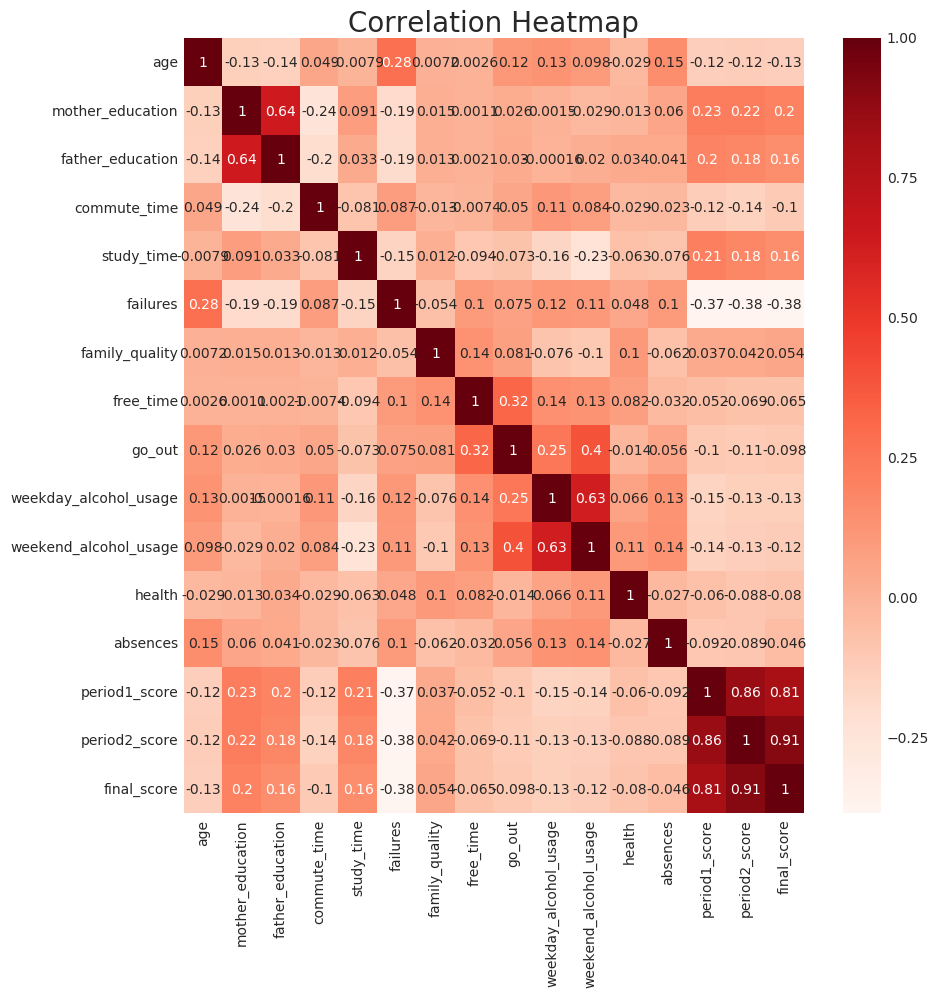

In [11]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

#  Classification
### Use Students' Information To Predict Their Final Grade

### 1 Prepare Dataset for Modelling

In [12]:
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [13]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [14]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,fair


In [15]:
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [16]:
# dataset train_test_split
from sklearn.cross_validation import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [17]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [18]:
# see total number of features
len(list(X_train))

58

### Every algorithm has its intrinsic capacity to outperform other algorithm depending upon the situation. For example, Random Forest performs much better with a large number of datasets than when data is small while Support Vector Machine performs better with a smaller number of data sets. 

### In general SVMs are good because the training algorithm is efficient, and it has a regularisation parameter, which forces you to think about regularisation and over-fitting. 

### 2. Decision Tree Classification

In [19]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

10    0.898089
11    0.898089
dtype: float64

In [20]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decisioin Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decisioin Tree Model Score : 0.9095890410958904 , Cross Validation Score : 0.8821656050955414


In [21]:
res = tree.predict(X_test)

[[116   3  11]
 [ 10  26   1]
 [ 12   0 135]]


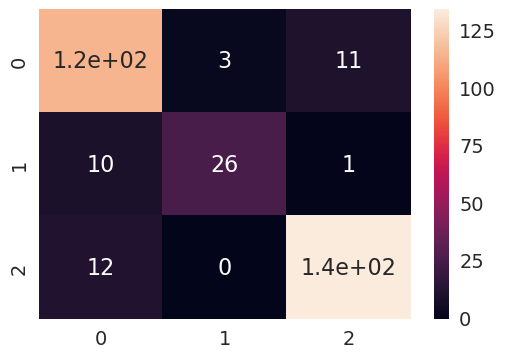

In [22]:
cm1=metrics.confusion_matrix(y_test,res)
print(cm1)
df_cm = pd.DataFrame(cm1, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [23]:
report = classification_report(y_test, res)
print(report)

             precision    recall  f1-score   support

          0       0.84      0.89      0.87       130
          1       0.90      0.70      0.79        37
          2       0.92      0.92      0.92       147

avg / total       0.88      0.88      0.88       314



### 3. Random Forest Classification

In [24]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

/home/aditya/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


42    0.878981
dtype: float64

In [25]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

5    0.88535
dtype: float64

In [26]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Raondom Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Raondom Forest Model Score : 0.9726027397260274 , Cross Validation Score : 0.8789808917197452


In [27]:
res = f.predict(X_test)

[[111   3  16]
 [ 11  25   1]
 [  7   0 140]]


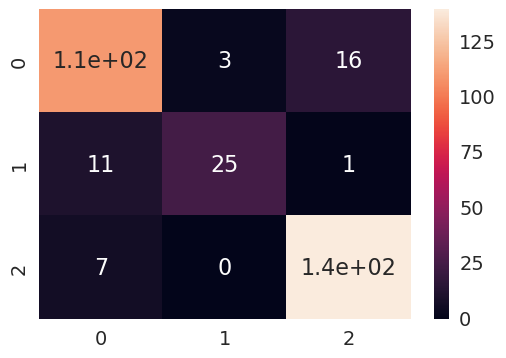

In [28]:
cm=metrics.confusion_matrix(y_test,res)
print(cm)
df_cm = pd.DataFrame(cm, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [29]:
report = classification_report(y_test, res)
print(report)

             precision    recall  f1-score   support

          0       0.86      0.85      0.86       130
          1       0.89      0.68      0.77        37
          2       0.89      0.95      0.92       147

avg / total       0.88      0.88      0.88       314



### 4. Support Vector Classification

In [30]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.9287671232876712 , Cross Validation Score : 0.8821656050955414


In [31]:
res = s.predict(X_test)

[[113   4  13]
 [  9  27   1]
 [ 10   0 137]]


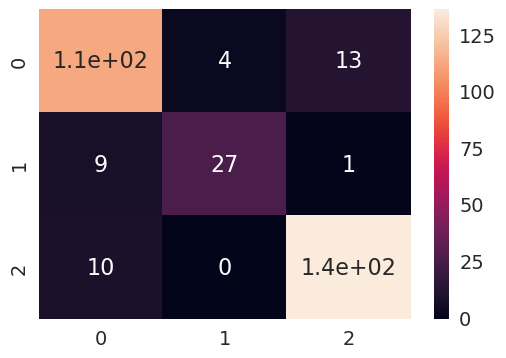

In [32]:
cm=metrics.confusion_matrix(y_test,res)
print(cm)
df_cm = pd.DataFrame(cm, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [33]:
report = classification_report(y_test, res)
print(report)

             precision    recall  f1-score   support

          0       0.86      0.87      0.86       130
          1       0.87      0.73      0.79        37
          2       0.91      0.93      0.92       147

avg / total       0.88      0.88      0.88       314



### 4. Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

In [65]:

lr = LogisticRegression()
l= lr.fit(X_train, y_train)
print("LR Model Score" , ":" , l.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , l.score(X_test, y_test))

LR Model Score : 0.8863013698630137 , Cross Validation Score : 0.8343949044585988


In [66]:
cross_val_score(LogisticRegression(), X_train, y_train).mean()

0.821937754390699

In [67]:
res = l.predict(X_test)

[[102   5  23]
 [ 14  22   1]
 [  9   0 138]]


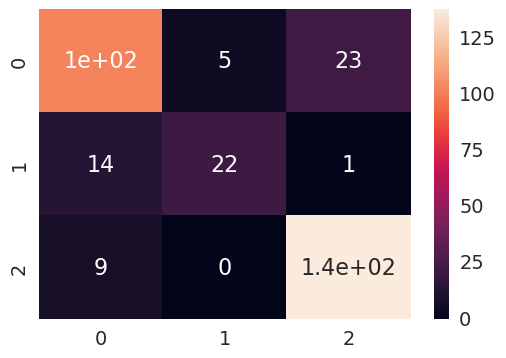

In [68]:
cm=metrics.confusion_matrix(y_test,res)
print(cm)
df_cm = pd.DataFrame(cm, range(3),
                  range(3))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [69]:
report = classification_report(y_test, res)
print(report)

             precision    recall  f1-score   support

          0       0.82      0.78      0.80       130
          1       0.81      0.59      0.69        37
          2       0.85      0.94      0.89       147

avg / total       0.83      0.83      0.83       314



### As visible from the above results, DecisionTree, RandomForest and Support Vector Classifiers perform almost equally.